# Minimum Daily Temperatures Dataset 
This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

### Autoregressive Forecast Model

### Autocorrelation Plots - To find out optimal lag value.

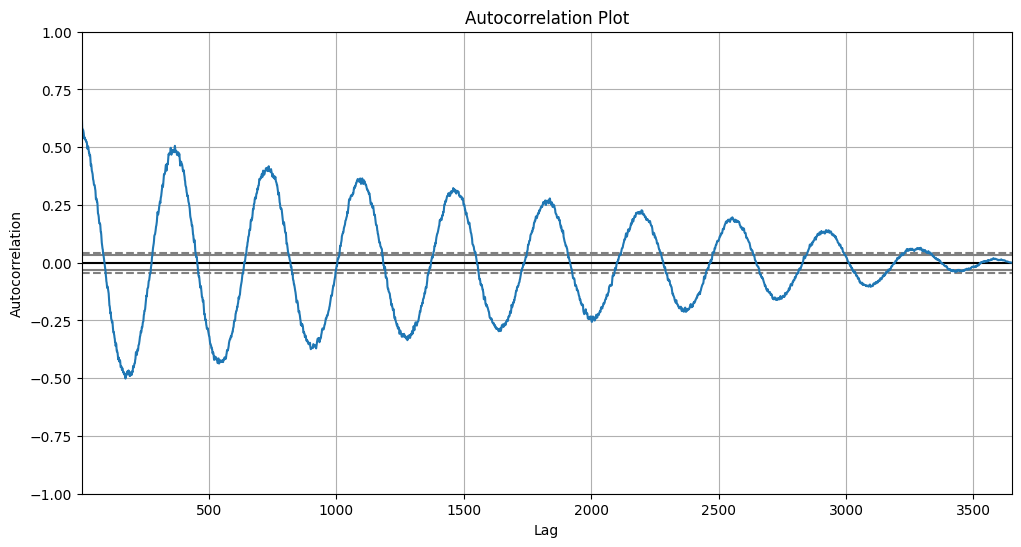

In [1]:
import warnings
warnings.filterwarnings('ignore')

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

pyplot.figure(figsize=(12, 6)) 

daily_min_temp_df = read_csv('Datasets/daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(daily_min_temp_df)
pyplot.title("Autocorrelation Plot")
pyplot.show()

## Autocorrelation Line Plot

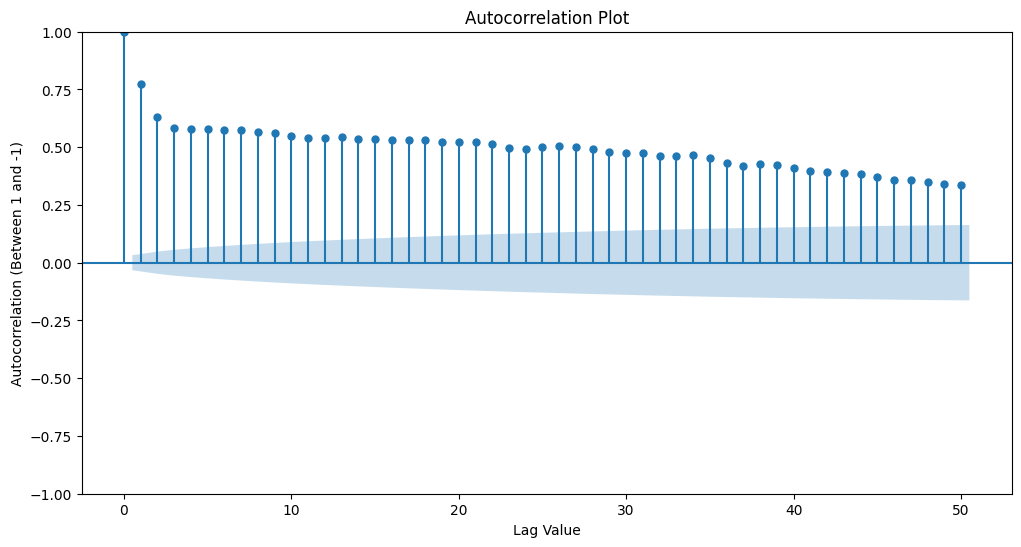

In [2]:
# Create a subplot with a specific size
fig, ax = pyplot.subplots(figsize=(12, 6))

plot_acf(daily_min_temp_df, lags=50, ax=ax)

pyplot.xlabel("Lag Value")
pyplot.ylabel("Autocorrelation (Between 1 and -1)")
pyplot.title("Autocorrelation Plot")

pyplot.show()

## Forecast For Next 7 Days And VisualizeData

Predictions:

Predicted value = 11.871275, Actual Value = 12.900000
Predicted value = 13.053794, Actual Value = 14.600000
Predicted value = 13.532591, Actual Value = 14.000000
Predicted value = 13.243126, Actual Value = 13.600000
Predicted value = 13.091438, Actual Value = 13.500000
Predicted value = 13.146989, Actual Value = 15.700000
Predicted value = 13.176153, Actual Value = 13.000000
Accuracy: 

Test RMSE: 1.225
Prediction Visualization



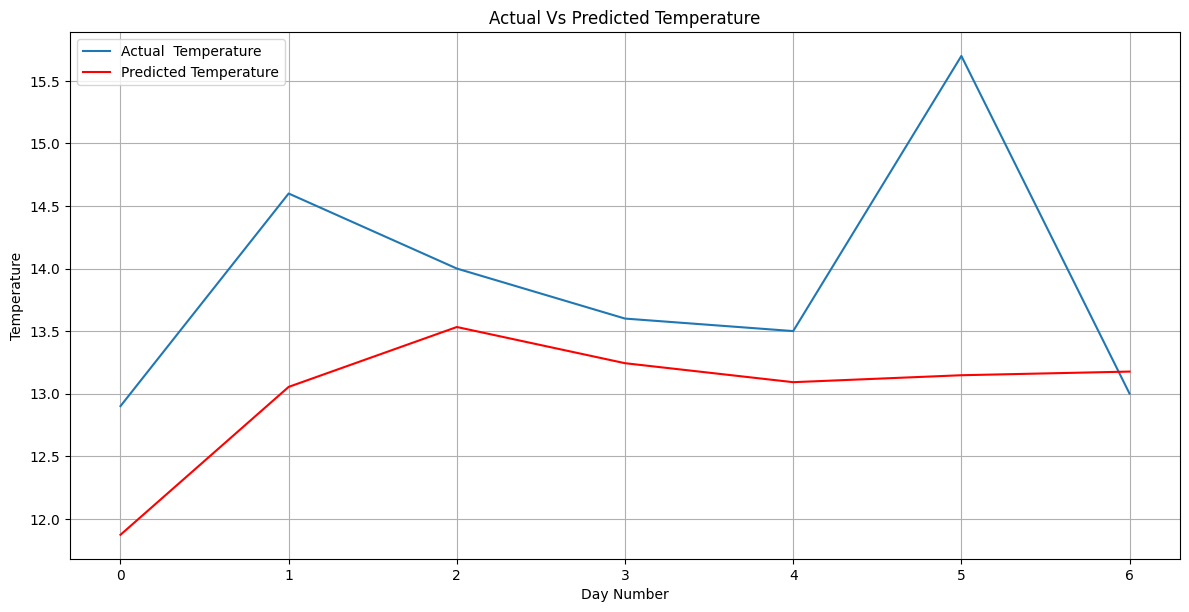

In [5]:
# split dataset
X = daily_min_temp_df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
print("======================================================================================")
model = AutoReg(train, lags=29)
model_fit = model.fit()

# make predictions
print("Predictions:\n")
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('Predicted value = %f, Actual Value = %f' % (predictions[i], test[i]))

print("======================================================================================")
rmse = sqrt(mean_squared_error(test, predictions))
print('Accuracy: \n')
print('Test RMSE: %.3f' % rmse)
print("======================================================================================")

print('Prediction Visualization\n')
# plot results
pyplot.figure(figsize=(12, 6)) 
pyplot.plot(test, label='Actual  Temperature')
pyplot.plot(predictions, color='red', label='Predicted Temperature')
pyplot.xlabel("Day Number")
pyplot.ylabel("Temperature")
pyplot.legend()
pyplot.grid()
pyplot.tight_layout()
pyplot.title("Actual Vs Predicted Temperature")
pyplot.show()

## Make Prediction in Feature - For n-steps 

Predictions: 

predicted=11.871275, expected=12.900000
predicted=13.659297, expected=14.600000
predicted=14.349246, expected=14.000000
predicted=13.427454, expected=13.600000
predicted=13.374877, expected=13.500000
predicted=13.479991, expected=15.700000
predicted=14.765146, expected=13.000000
Accuracy: 

Test RMSE: 1.204
Prediction Visualization



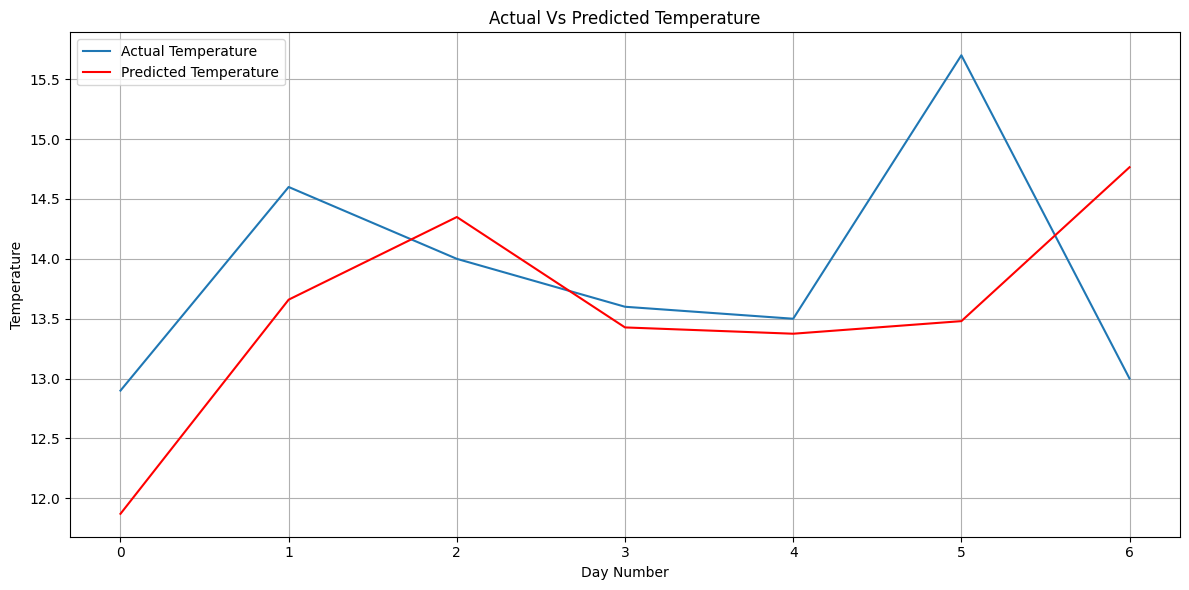

In [4]:
# split dataset
X = daily_min_temp_df.values
train, test = X[1:len(X)-7], X[len(X)-7:]

# train autoregression
window = 29
model = AutoReg(train, lags=29)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()

print("======================================================================================")
print("Predictions: \n")
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

print("======================================================================================")
rmse = sqrt(mean_squared_error(test, predictions))
print('Accuracy: \n')
print('Test RMSE: %.3f' % rmse)
print("======================================================================================")

# plot results
print('Prediction Visualization\n')
pyplot.figure(figsize=(12, 6)) 
pyplot.plot(test, label='Actual Temperature')
pyplot.plot(predictions, color='red', label='Predicted Temperature')
pyplot.xlabel("Day Number")
pyplot.ylabel("Temperature")
pyplot.title("Actual Vs Predicted Temperature")
pyplot.grid(True)
pyplot.tight_layout()
pyplot.legend()
pyplot.show()